<a href="https://colab.research.google.com/github/muken1128/machine-learning/blob/main/neural-network/convolutional_neural_network001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 参考
# https://qiita.com/sw1394/items/902b4d086e77f46976f0

In [9]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [10]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [11]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [18]:
train_images[10][0][0]

array([53, 65, 53], dtype=uint8)

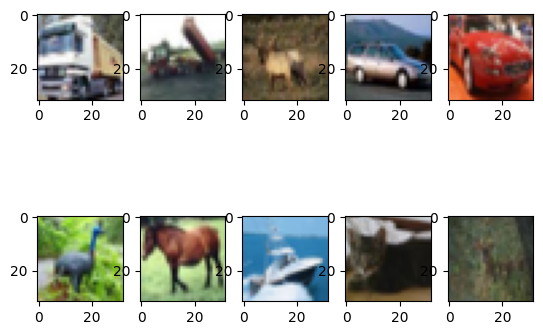

In [13]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i+1])
plt.show()

In [20]:
# ０～１で表す正規化する

train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0


# 正解データはone-hotに置き換える
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [21]:
model = Sequential()

# 畳み込み処理１回目（Conv→Conv→Pool→Dropout）
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 畳み込み処理２回目（Conv→Conv→Pool→Dropout）
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# ニューラルネットワークによる分類（Flatten→Dense→Dropout→Dense）
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model = Sequential()

# 畳み込み処理１回目（Conv→Conv→Pool→Dropout）
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 畳み込み処理２回目（Conv→Conv→Pool→Dropout）
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# ニューラルネットワークによる分類（Flatten→Dense→Dropout→Dense）
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [26]:
# 任意のオプティマイザと損失関数を設定してモデルをコンパイルする
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# ネットワーク各層の出力内容を確認する
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(train_images, train_labels, batch_size=128,
    epochs=20, validation_split=0.1)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 265s 745ms/step - accuracy: 0.0994 - loss: 2.3029 - val_accuracy: 0.0976 - val_loss: 2.3027
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 258s 733ms/step - accuracy: 0.0978 - loss: 2.3028 - val_accuracy: 0.0976 - val_loss: 2.3027
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 264s 738ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3028
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 255s 719ms/step - accuracy: 0.0998 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3028
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 254s 723ms/step - accuracy: 0.0996 - loss: 2.3027 - val_accuracy: 0.0950 - val_loss: 2.3028
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 260s 717ms/step - accuracy: 0.0988 - loss: 2.3026 - val_accuracy: 0.0958 - val_loss: 2.3028
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 261s 714ms/step - accuracy: 0.0998 - loss: 2.3027 - val_accuracy: 0.0950 - val_loss: 2.3029
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 263s 717ms/step - accuracy: 0.1009 -

In [38]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

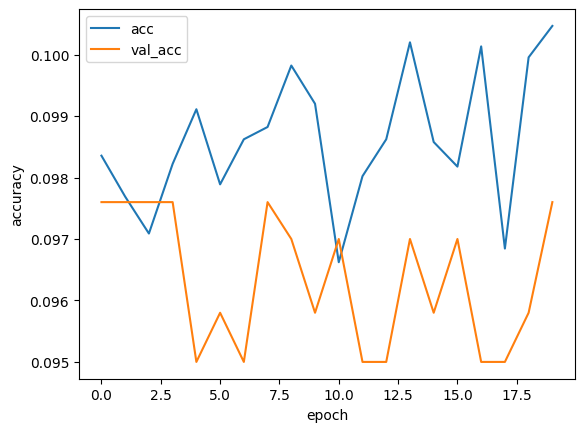

In [39]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.0968 - loss: 2.3027
loss: 2.303
acc: 0.100


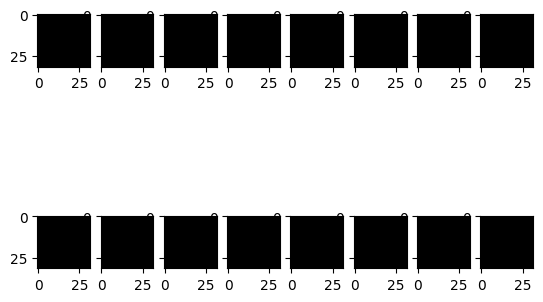

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
['automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile', 'automobile']


In [42]:
# 推論する画像の表示
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(test_images[i])
plt.show()

# 推論したラベルの表示
test_predictions = model.predict(test_images[0:16])
test_predictions = np.argmax(test_predictions, axis=1)[0:16]
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']
print([labels[n] for n in test_predictions])